# * Note about adding the intercept column:

This solution was prepared with the intercept column in mind. However, if someone did not use the intercept column and was consistent about this across all the models, they were not penalized for this.

## **Problem 4: Hosuing Prices Prediction (25 Points)**

---

## **Point Distribution**
| Criteria | Points | Description |
|----------|--------|-------------|
| **Dealing With Rank Deficieny and Intercept** | 10 | Correctly handles the rank deficieny of the features and adds the intercept column. If intercept column is not added, this consistency must be kept when fitting the sklearn model and use fit_intercept=False |
| **Hat and Beta Matrix Calculation** | 5 | Correctly calculated the Hat Matrix and the Beta Matrix |
| **Predicting using our calculated model** | 5 | Correctly used the Beta Matrix and input features to make prediction on the test data|
| **Fitting sklearn model and explanation** | 5 | Correctly used sklearn model to fit the data and make prediction, and explains any discrepency between the two models' outputs and the ground truth values |

In [ ]:
import numpy as np
from numpy.linalg import inv
np.set_printoptions(precision=3)



### 4.1 Dealing with rank deficiency and intercept [10]




In [ ]:
# training data using the dummy variables “is_urban”, “is_suburban”, and “is_rural”

x_train = np.array([[1500, 1, 0, 0], [2000, 0, 1, 0], [1800, 0, 0, 1], [2200, 1, 0, 0], [1700, 0, 1, 0], [2000, 0, 0, 1]], np.float32)
y_train = np.array([350000,400000,300000,450000,370000,320000])

# Add intercept column ---> convert x(n,d) into x(n,1+d)
X_with_intercept = x_train
X_with_intercept = np.c_[np.ones(X_with_intercept.shape[0]), X_with_intercept]


# the dummy variables have linear dependence among them as (is_urban + is_suburban + is_rural) = 1. This can lead to rank deficiency.
# Hence, we should drop one of the dummy variables. Let's drop the last one.
X_with_intercept = X_with_intercept[:,0:4]







### 4.2 Hat and Beta Matrix Calculation [5]

In [ ]:
## calculate Hat matrix and beta matrix
x_t = X_with_intercept.T

x_t_x = np.matmul(x_t, X_with_intercept)

ainv = inv(x_t_x)

# calculate beta
beta = np.matmul( np.matmul(ainv,x_t)  ,y_train)

# calculate hat
hat_matrix = np.matmul(np.matmul(X_with_intercept,ainv), x_t)


### 4.3 Predicting using our calculated model [5]

In [ ]:
# testing data
x_test = np.array([[1900, 1, 0, 0], [1600, 0, 1, 0], [2100, 0, 0, 1]], np.float32)

# Add intercept column ---> convert x(n,d) into x(n,1+d)
# then remove rank deficiency.

x_test_with_intercept = x_test
x_test_with_intercept = np.c_[np.ones(x_test_with_intercept.shape[0]), x_test_with_intercept]
x_test_with_intercept = x_test_with_intercept[:,0:4]


pred_values = np.matmul(x_test_with_intercept,beta)

print("Predicted values: ", pred_values)
print("Beta matrix values: ",beta)

Predicted values:  [406693.548 351532.258 336774.194]
Beta matrix values:  [55645.161   133.871 96693.548 81693.548]


### 4.3 Fitting sklearn model and explanation [5]

In [ ]:
from sklearn.linear_model import LinearRegression

# dropping last variable to remove rank deficiency
X_train_2 = x_train[:,0:3]

# fitting model
model = LinearRegression()
model.fit(X_train_2, y_train)

# predicting using the model
sklearn_pred_values = model.predict(x_test[:,0:3])


print(f"predicted values from sklearn model:", sklearn_pred_values)
print(f"Predicted values from our     model:", pred_values)

print(f"\ncoefficients from sklearn model: ", model.intercept_, model.coef_)
print(f"coefficients from our model:     ", beta)



predicted values from sklearn model: [406693.56 351532.28 336774.2 ]
Predicted values from our     model: [406693.548 351532.258 336774.194]

coefficients from sklearn model:  55645.156 [  133.871 96693.555 81693.58 ]
coefficients from our model:      [55645.161   133.871 96693.548 81693.548]


The answers match with each other but do not fully match the true values. This can be expected as there are not many training values and it may not be possible to fit the features using linear regression.

## **Problem 5: Food delivery time prediction (20 Points)**

---

## **Point Distribution**
| Criteria | Points | Description |
|----------|--------|-------------|
| **Fitting a regular Linear Regression Model** | 5 | Correctly used sklearn model to fit the data and make prediction. |
| **Hat and Beta Matrix Calculation** | 4 | Correctly calculated the Hat Matrix and the Beta Matrix. If the fit_intercept=False was NOT used with the sklearn model, the intercept column must be considered in this step.|
| **Calculate Leverage and Residual** | 6 | Correctly calculated the Leverage and Residual, and plotted them properly to see the relationship of the values for the data points.|
| **Analyze Leverage and Residual** | 5 | Correctly explains the siginificance of the levarage and residual values. |

In [ ]:
# Import basic required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
sns.set_style({'axes.grid':False})



In [ ]:
# loading the csv data
# please use your appropriate path to the files. You can just simply upload them to the colab environment.

train_df = pd.read_csv('deliverytimeprediction_train.csv')
test_df = pd.read_csv('deliverytimeprediction_test.csv')

# # examining the feature names and shape of train, test data

print(train_df.shape, "\n",test_df.shape)
train_df.info()


(700, 15) 
 (300, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             700 non-null    float64
 1   Preparation_Time_min    700 non-null    int64  
 2   Courier_Experience_yrs  700 non-null    float64
 3   Weather_Foggy           700 non-null    bool   
 4   Weather_Rainy           700 non-null    bool   
 5   Weather_Snowy           700 non-null    bool   
 6   Weather_Windy           700 non-null    bool   
 7   Traffic_Level_Low       700 non-null    bool   
 8   Traffic_Level_Medium    700 non-null    bool   
 9   Time_of_Day_Evening     700 non-null    bool   
 10  Time_of_Day_Morning     700 non-null    bool   
 11  Time_of_Day_Night       700 non-null    bool   
 12  Vehicle_Type_Car        700 non-null    bool   
 13  Vehicle_Type_Scooter    700 non-null    bool   
 14  Delivery_Time_min   

In [ ]:
# # Convert boolean to 1 and 0 for numerical processing

train_df = train_df.astype(float)


In [ ]:
# first 5 training samples
train_df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
0,1.88,24.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,35.0
1,0.86,21.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0
2,8.37,13.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,42.0
3,8.53,8.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,41.0
4,16.38,7.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,90.0


## Data exploration -- optional


In [ ]:
# # fig, ax = plt.subplots(figsize = (14,6))
# # sns.distplot(train_df.Delivery_Time_min, bins = 200, color = 'firebrick', ax = ax)
# # ax.set_title('Distribution of Delivery_Time_min')
# # ax.set_ylabel('relative frequency')
# # plt.show()


# corr = train_df.corr().sort_values(by='Delivery_Time_min', ascending=False)
# fig, ax = plt.subplots(figsize = (14,8))
# sns.heatmap(corr, annot = True, cmap ='bwr', ax = ax, fmt='.2f', linewidths = 0.05, annot_kws = {'size': 17}, vmin=-1, vmax=1)
# ax.tick_params(labelsize = 15)
# ax.set_title('Correlation with Delivery_Time_min', fontsize = 22)
# plt.show()

## **5.1 Fitting a regular Linear Regression Model** [5]


RMSE of linear regression model with all features: 9.06


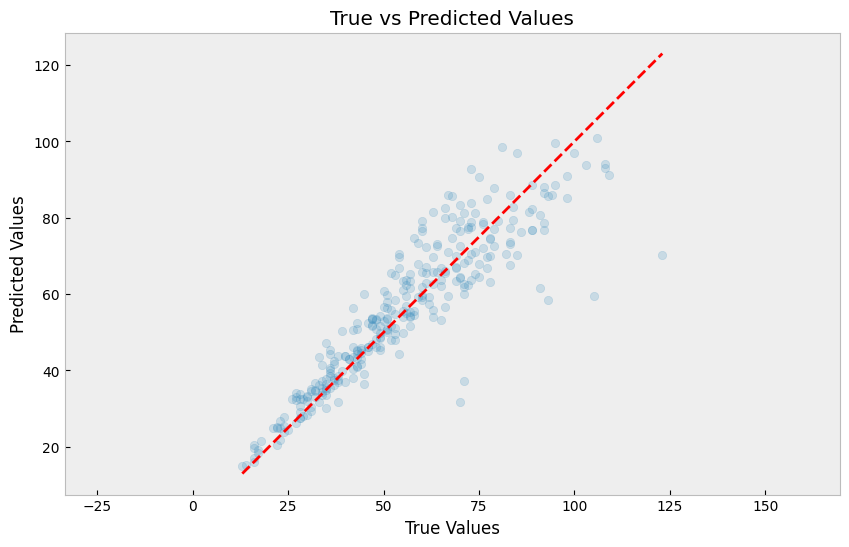

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


# splitting data into features and labels
y_train = train_df.Delivery_Time_min
X_train = train_df.drop(['Delivery_Time_min'], axis = 1)
y_test = test_df.Delivery_Time_min
X_test = test_df.drop(['Delivery_Time_min'], axis = 1)


def train_and_predict(X_train, y_train, X_test, feat=None):
    if feat:
        X_train = X_train[feat]
        X_test = X_test[feat]

    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)

    y_pred = linear_reg.predict(X_test)

    return y_pred

# Experiment: Linear regression model with all features
y_pred = train_and_predict(X_train, y_train, X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))



## optional -- RMSE printing and plotting

# print('RMSE of linear regression model with all features: \
# {:0.2f}'.format(rmse))

# # Plotting the predicted values against the true values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.2)
# plt.title('True vs Predicted Values')
# plt.xlabel('True Values')
# plt.ylabel('Predicted Values')

# # Set the same boundaries for x and y axes
# min_val = min(min(y_test), min(y_pred))
# max_val = max(max(y_test), max(y_pred))

# plt.xlim(min_val, max_val)
# plt.ylim(min_val, max_val)

# # Plot a 45-degree line
# plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

# plt.axis('equal')  # Ensure aspect ratio is equal
# plt.show()

## 5.2 Calculating the hat matrix [4]


In [ ]:
import numpy as np
from numpy.linalg import inv



x_train = X_train.to_numpy()

# Add intercept column ---> convert x(n,d) into x(n,1+d)
X_with_intercept = x_train
X_with_intercept = np.c_[np.ones(X_with_intercept.shape[0]), X_with_intercept]


# the variables here do NOT have linear dependence among them. Hence, we do not need to drop any of the variables.


# calculate Hat matrix and beta matrix
x_t = X_with_intercept.T

x_t_x = np.matmul(x_t, X_with_intercept)

ainv = inv(x_t_x)

# calculate beta
beta = np.matmul( np.matmul(ainv,x_t)  ,y_train)

# calculate hat
hat_matrix = np.matmul(np.matmul(X_with_intercept,ainv), x_t)



# ## Predicting using our calculated model -- optional
# x_test = X_test.to_numpy()
# x_test_with_intercept = x_test
# x_test_with_intercept = np.c_[np.ones(x_test_with_intercept.shape[0]), x_test_with_intercept]


# y_pred_manual = np.matmul(x_test_with_intercept,beta)

# rmse = sqrt(mean_squared_error(y_test, y_pred_manual))

# print('RMSE of linear regression model with all features using calculated Hat Matrix: {:0.2f}'.format(rmse))



RMSE of linear regression model with all features using calculated Hat Matrix: 9.06


## 5.3 Calculate Leverage and Residual [6]
Correct Leverage calculation - 2
Correct Residual calculation - 2
plot - 2

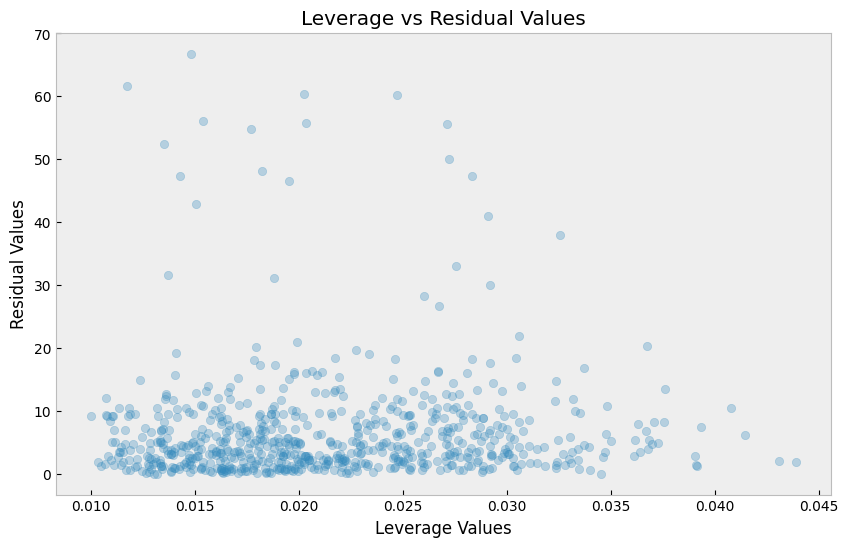

In [ ]:
# calculating the leverage and residual


y_train_pred = train_and_predict(X_train, y_train, X_train)


leverage = np.diag(hat_matrix)
residual = abs(y_train-y_train_pred)


## plot leverage vs. residual
plt.figure(figsize=(10, 6))
plt.scatter(leverage, abs(y_train-y_train_pred), alpha=0.3)
plt.title('Leverage vs Residual Values')
plt.xlabel('Leverage Values')
plt.ylabel('Residual Values')

plt.show()

## 5.4 Analyze Leverage and Residual [5]

Points with high leverage have greater influence on the regression line as they are usually points with values farther from the typical distribution. Points with low levarage do not affect the line much as there are usually other points similar to them in the feature space and mitigate their individual influence.

The points with low residual are points which are closely aligned with the usual data trends whereas the high residual points are more outliers.

Hence, points with high leverage but low residual affect the line but they are generally closely aligned with the trends and predicted well by the regression line.
However, the points with high leverage and high reidual are the significant points which influence the line but are farther away from the typical trends and can introduce more variability. Let us focus on these values.

In [ ]:
## let's examine the points with leverage greater than 0.025 and residual greater than 35

high_res_high_lev = pd.DataFrame(columns=train_df.columns)

for i in range(0,len(residual)):
  if ((residual[i]>35) and (leverage[i]> 0.025)):
    print(i)
    # print(train_df.iloc[i])
    # new_df = new_df.append(train_df.iloc[i], ignore_index=True)
    high_res_high_lev.loc[len(high_res_high_lev)] = train_df.iloc[i]


13
165
247
509
693


In [ ]:
#

To better understand the insight form the residual and leverage, first let us explore the data a bit to understand the general trends.

In [ ]:
## first let's analyze the distibution of the data

train_df.describe()


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,10.127057,17.087143,4.630000,0.107143,0.210000,0.095714,0.095714,0.371429,0.421429,0.288571,0.347143,0.088571,0.192857,0.308571,57.312857
std,5.657501,7.216029,2.876865,0.309516,0.407599,0.294409,0.294409,0.483532,0.494141,0.453422,0.476402,0.284327,0.394824,0.462234,22.336754
min,0.590000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,5.105000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000
50%,10.210000,17.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000
75%,14.942500,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,71.000000
max,19.990000,29.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,153.000000


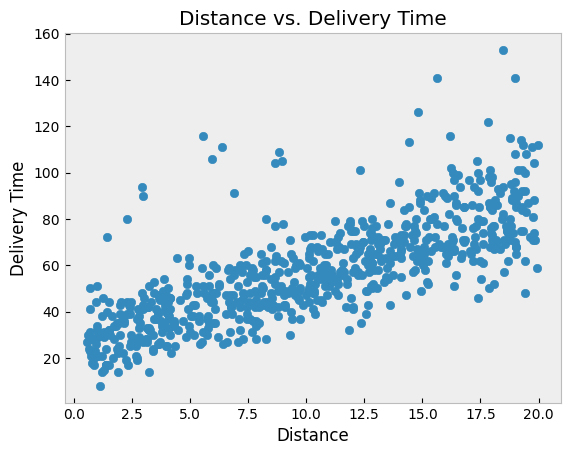

In [ ]:
# let's see the typical relationship between Distance and Delivery time as Distance has the highest correlation with target variable (delivery time)

import matplotlib.pyplot as plt

# Sample data
distance = train_df.Distance_km
delivery_time = train_df.Delivery_Time_min

# Create the plot
plt.scatter(distance, delivery_time)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("Delivery Time")
plt.title("Distance vs. Delivery Time")

# Show the plot
plt.show()




In [ ]:
# Now let us analye the high_res high_lev values

high_res_high_lev

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Delivery_Time_min
0,12.33,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,101.0
1,5.55,18.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,116.0
2,2.29,8.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0
3,2.99,9.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
4,5.93,27.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,106.0




From the above values, we can see that the high leverage high residual points have interesting values. For example, the first point with 12.33 km has a high delivery time above 100.
The other points also have similary high delivery times compared to the distances. Specially, points 1 and 4 have distances less than 6 km but their delivery times are above 100! Interestignly, they have high preparation times and the weather was foggy.

## **Problem 6: Variants of Regression (35 Points)**

---

## **Point Distribution**
| Criteria | Points | Description |
|----------|--------|-------------|
| **Regression by Successive Orthogonalization** | 10 | Correctly used successive orthogonalization to fit the data and printed the coefficients. (use of the intercept column is optional but must be consistent across all models) |
| **Lasso Regression** | 10 | Correctly used Lasso Regression to fit the data and identified which features were kept and which were eleminated.|
| **Ridge Regression** | 6 | Correctly used Ridge Regression to fit the data.|
| **Comparison of Coefficients** | 4 | Correctly explains the difference in values between the coefficients of the models and discusses the sparsity of Lasso method. |
| **Model Comparison ** | 5 | Correctly calculated at least one error metric and chooses the best method with proper explanation |

In [ ]:
import numpy as np

# this optional helper function is for calculating the error metrics for ques 6 part b

def regression_errors(y_true, y_pred):
    """
    Compute Mean Squared Error (MSE), R-squared (R²), and Residual Sum of Squares (RSS).

    Parameters:
    y_true (np.ndarray): True labels
    y_pred (np.ndarray): Predicted labels

    Returns:
    dict: Dictionary containing MSE, R², and RSS values.
    """
    # Mean Squared Error
    mse = np.mean((y_true - y_pred) ** 2)

    # R-squared (Coefficient of Determination)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # Total Sum of Squares (SST)
    ss_residual = np.sum((y_true - y_pred) ** 2)  # Residual Sum of Squares (RSS)
    r_squared = 1 - (ss_residual / ss_total)

    # Residual Sum of Squares
    rss = ss_residual

    return {"MSE": mse, "R²": r_squared, "RSS": rss}



## 6.1 Regression by Successive Orthogonalization [6+4]
correct implementation - 6

printing coefficients properly - 4

In [ ]:
from sklearn.metrics import mean_squared_error

def successive_orthogonalization(X_train, y_train, X_test, y_test):
    n_samples_train, n_features = X_train.shape
    n_samples_test = X_test.shape[0]

    coefficients = {}
    rmses = {}
    residuals = y_train.copy()

    feature_names = X_train.columns
    X_train_np = X_train.values
    X_test_np = X_test.values
    y_test_np = y_test.values

    # Storage for orthogonalized features
    Z_train = np.zeros_like(X_train_np)
    Z_test = np.zeros_like(X_test_np)

    for i in range(n_features):
        feature_name = feature_names[i]
        x_i_train = X_train_np[:, i].copy()
        x_i_test = X_test_np[:, i].copy()  # Keep test feature for transformation

        # Orthogonalization
        for j in range(i):
            x_j_train = Z_train[:, j]  # Use previously orthogonalized feature
            x_j_test = Z_test[:, j]  # Use the same transformation on test data

            # Compute projection coefficient (scalar)
            proj_coeff = np.dot(x_i_train, x_j_train) / np.dot(x_j_train, x_j_train)

            # Apply projection to both train and test
            x_i_train -= proj_coeff * x_j_train
            x_i_test -= proj_coeff * x_j_test  # Correct shape alignment

        # Store orthogonalized feature
        Z_train[:, i] = x_i_train
        Z_test[:, i] = x_i_test

        # Compute regression coefficient
        coefficient = np.dot(x_i_train, residuals) / np.dot(x_i_train, x_i_train)
        # residuals -= coefficient * x_i_train  # Update residuals
        temp_var = coefficient * x_i_train
        residuals = residuals - temp_var  # Update residuals
        coefficients[feature_name] = coefficient

        # Compute RMSE using test set predictions
        y_pred_test = np.dot(Z_test[:, :i+1], np.array(list(coefficients.values())))
        rmse = np.sqrt(mean_squared_error(y_test_np, y_pred_test))
        rmses[feature_name] = rmse

    # # ## optional - prinitng error metrics
    # err = regression_errors(y_test_np, y_pred_test)
    # print("\n Error Metrics for Successive Orthogonalization\n",err)


    return coefficients, rmses


X_train_copy = X_train.copy()
X_train_copy['intercept'] = 1  # Add intercept column


X_test_copy = X_test.copy()
X_test_copy['intercept'] = 1  # Add intercept column

# coefficients, rmses = successive_orthogonalization(X_train, y_train, X_test, y_test)
# for feature_name, coeff in coefficients.items():
#     print(f"Coefficient for {feature_name}: {coeff}; RMSE: {rmses[feature_name]:.4f}")

coefficients, rmses = successive_orthogonalization(X_train_copy, y_train, X_test_copy, y_test)

for feature_name, coeff in coefficients.items():
    print(f"Coefficient for {feature_name}: {coeff}; RMSE: {rmses[feature_name]:.4f}")


 Error Metrics for Successive Orthogonalization
 {'MSE': 82.05574690831263, 'R²': 0.8204448958645276, 'RSS': 24616.724072493787}
Coefficient for Distance_km: 5.03634509551967; RMSE: 18.0732
Coefficient for Preparation_Time_min: 1.293294559124026; RMSE: 10.6032
Coefficient for Courier_Experience_yrs: -0.04093710846649504; RMSE: 10.6107
Coefficient for Weather_Foggy: 6.292448259001453; RMSE: 10.4609
Coefficient for Weather_Rainy: 4.7851839542657535; RMSE: 10.4530
Coefficient for Weather_Snowy: 9.620019673138215; RMSE: 10.0916
Coefficient for Weather_Windy: 5.049362925259248; RMSE: 10.0715
Coefficient for Traffic_Level_Low: -6.264791075408579; RMSE: 9.5599
Coefficient for Traffic_Level_Medium: -1.5292500455381188; RMSE: 9.6076
Coefficient for Time_of_Day_Evening: 2.6785373608445893; RMSE: 9.6366
Coefficient for Time_of_Day_Morning: 3.143119431086924; RMSE: 9.6905
Coefficient for Time_of_Day_Night: 2.9863808558528233; RMSE: 9.6931
Coefficient for Vehicle_Type_Car: 1.451442546515542; RMSE:

# 6.2 Lasso Regression [6+4]
correct implementation - 6

printing features list properly - 4

In [ ]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import KFold

# Define the LassoCV model with cross-validation
lasso_cv = LassoCV(cv=KFold(n_splits=5, shuffle=True, random_state=42), random_state=42)  # 5-fold cross-validation

# Fit the model to the training data
lasso_cv.fit(X_train, y_train)

# Get the best alpha (regularization parameter)
best_alpha = lasso_cv.alpha_
print(f"Best alpha (regularization parameter): {best_alpha}")

# Fit the Lasso model with the best alpha
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_best.predict(X_test)

# Evaluate the model
rmse_lasso = sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE of Lasso regression: {rmse_lasso}")


# ## optional - prinitng error metrics
# err = regression_errors(y_test, y_pred_lasso)
# print("\n Error Metrics for Lasso Regression\n",err)




# Identify which features are eliminated (coefficients close to zero)
feature_names = X_train.columns
coefficients = lasso_best.coef_

eliminated_features = []
retained_features = []
for feature, coef in zip(feature_names, coefficients):
  if abs(coef) < 1e-4:  # Consider coefficients close to zero as eliminated
    eliminated_features.append(feature)
  else:
    retained_features.append(feature)

print("Eliminated Features:")
print(eliminated_features)
print("\nRetained Features:")
print(retained_features)


lasso_coeff = coefficients



Best alpha (regularization parameter): 0.09707290640816325
RMSE of Lasso regression: 9.007379160444644

 Error Metrics for Lasso Regression
 {'MSE': 81.13287934001247, 'R²': 0.8224643227611537, 'RSS': 24339.86380200374}
Eliminated Features:
['Time_of_Day_Morning', 'Time_of_Day_Night', 'Vehicle_Type_Car']

Retained Features:
['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy', 'Traffic_Level_Low', 'Traffic_Level_Medium', 'Time_of_Day_Evening', 'Vehicle_Type_Scooter']


# 6.3 Ridge Regression [6]

In [ ]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import KFold

# Define the RidgeCV model with cross-validation
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=KFold(n_splits=5, shuffle=True, random_state=42))

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Get the best alpha (regularization parameter)
best_alpha = ridge_cv.alpha_
print(f"Best alpha (regularization parameter): {best_alpha}")

# Fit the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha, random_state=42)
ridge_best.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_best.predict(X_test)

# Evaluate the model
rmse_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE of Ridge regression: {rmse_ridge}")


# # ## optional - prinitng error metrics
# err = regression_errors(y_test, y_pred_ridge)
# print("\n Error Metrics for Ridge Regression\n",err)


# optional - printing coefficients
# # You can further analyze coefficients if needed
# coefficients = ridge_best.coef_
# print("Ridge Regression Coefficients:", coefficients)



Best alpha (regularization parameter): 1.0
RMSE of Ridge regression: 9.047405032604958

 Error Metrics for Ridge Regression
 {'MSE': 81.85553782400554, 'R²': 0.8208829951364993, 'RSS': 24556.66134720166}
Ridge Regression Coefficients: [  2.978   0.958  -0.696   7.373   4.983   9.702   1.801 -12.35   -6.815
   1.428   0.369  -0.289   0.295  -1.118]


### 6.4 Comparison of Coefficients: [4]
As we can see below, the coefficients of Ridge Regression are similar to those of Lasso Regression for most of the features. However, Lasso has more coefficients which are nearly zero and thus is more sparse. This can help with removing redundant features.

In [ ]:
feature_names = X_train.columns

print("Coefficients of Ridge:")
for feature, coef in zip(feature_names, coefficients):
  print(f"Coefficient for {feature}: {coef}")

print("\nCoefficients of Lasso:")
for feature, coef in zip(feature_names, lasso_coeff):
  print(f"Coefficient for {feature}: {coef}")



Coefficients of Ridge:
Coefficient for Distance_km: 2.978152683740471
Coefficient for Preparation_Time_min: 0.9584476913491252
Coefficient for Courier_Experience_yrs: -0.6958614565420228
Coefficient for Weather_Foggy: 7.373400541738776
Coefficient for Weather_Rainy: 4.98293352149111
Coefficient for Weather_Snowy: 9.701947072651878
Coefficient for Weather_Windy: 1.8006241687126834
Coefficient for Traffic_Level_Low: -12.350041454109107
Coefficient for Traffic_Level_Medium: -6.815143442584468
Coefficient for Time_of_Day_Evening: 1.4280600354282629
Coefficient for Time_of_Day_Morning: 0.3685485632901375
Coefficient for Time_of_Day_Night: -0.289125510028912
Coefficient for Vehicle_Type_Car: 0.29460350078751424
Coefficient for Vehicle_Type_Scooter: -1.1178646164210488

Coefficients of Lasso:
Coefficient for Distance_km: 2.983619965851282
Coefficient for Preparation_Time_min: 0.9548836978713656
Coefficient for Courier_Experience_yrs: -0.6836908987647516
Coefficient for Weather_Foggy: 5.814135

## 6.5 Model Comparison [3+2]

### 6. 5. a. Error Comparison [3x1] - correct implementation of any one error metric for all three models.

The metric can be any one appropriate metric such as RMSE, R^2, RSS

Here are the error metrics for each of the three methods: (any one set of metrics is enough)



a. Successive {'RMSE': 9.0585, 'R²': 0.8204448958645276, 'RSS': 24616.724072493787}

b. Lasso: {'RMSE': 9.0073, 'R²': 0.8224643227611537, 'RSS': 24339.86380200374}

c. Ridge: {'RMSE': 9.0474, 'R²': 0.8208829951364993, 'RSS': 24556.66134720166}



Optional Explanation:

We can see that they are not highly different in terms of error metrics. Lasso regression seems to have the best performance by a slight margin. This can happen because there are a quite a few features in this dataset which may not all be relevant. Lasso helps to ignore these features and allows the model to focus on the important ones.


### 6.5.b Other Comparison [2]

The Lasso model is the best here as it performs best and also it is more interpretable. It has a sparse set of coefficents and thus allows to remove redundant features. This highlights the important features and lets us know which features the model focuses on.